Import Module

In [2]:
import pandas as pd 
import matplotlib.pyplot as plt

Reading Data

In [3]:
data=pd.read_parquet('C:\\Users\\HP\\Desktop\\api_management_clean.parquet')

In [4]:
data.head()

,log_level,code,method,username,Price,gwStatus,planName,received_at,log_type,providerName,gatewayName,response_status,status,response_Time,paymentType,endpoint,providerResponse_Time,gwCode,call_type,api_type
0,WARNING,429,POST,username_1376,10,0,Silver,2022-06-28T10:24:46.000000Z,INPUT,provider_186,gateway_657,200,1,958,PREPAID,endpoint_1201,479,600,EXTERNAL,undefined
1,WARNING,335,GET,username_1376,10,0,Bronze,2021-09-18T05:43:21.000000Z,OUTPUT,provider_186,gateway_657,400,0,576,POSTPAID,endpoint_1201,288,404,EXTERNAL,undefined
2,WARNING,404,POST,username_1376,20,0,Gold,2022-04-03T03:52:45.000000Z,OUTPUT,provider_186,gateway_657,401,0,395,POSTPAID,endpoint_1201,197,300,INTERNAL,oauth
3,ERROR,400,POST,username_1376,20,0,Bronze,2023-02-14T18:38:42.000000Z,INPUT,provider_186,gateway_657,200,1,342,POSTPAID,endpoint_1201,171,408,INTERNAL,undefined
4,WARNING,429,GET,username_1376,50,0,Bronze,2021-07-12T11:09:06.000000Z,OUTPUT,provider_186,gateway_657,403,0,330,PREPAID,endpoint_1201,165,404,EXTERNAL,undefined


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 20 columns):
 #   Column                 Non-Null Count    Dtype 
---  ------                 --------------    ----- 
 0   log_level              1000000 non-null  object
 1   code                   1000000 non-null  object
 2   method                 1000000 non-null  object
 3   username               1000000 non-null  object
 4   Price                  1000000 non-null  object
 5   gwStatus               1000000 non-null  object
 6   planName               1000000 non-null  object
 7   received_at            1000000 non-null  object
 8   log_type               1000000 non-null  object
 9   providerName           1000000 non-null  object
 10  gatewayName            1000000 non-null  object
 11  response_status        1000000 non-null  object
 12  status                 1000000 non-null  object
 13  response_Time          1000000 non-null  int64 
 14  paymentType            1000000 non-

In [6]:
data.describe()

,response_Time,providerResponse_Time
count,1000000.000000,1000000.000000
mean,393.562312,196.529349
std,823.455773,411.748704
min,0.000000,0.000000
25%,150.000000,75.000000
50%,249.000000,124.000000
75%,356.000000,178.000000
max,10268.000000,5134.000000


Data Preprocessing 

Outlier

Boxplot

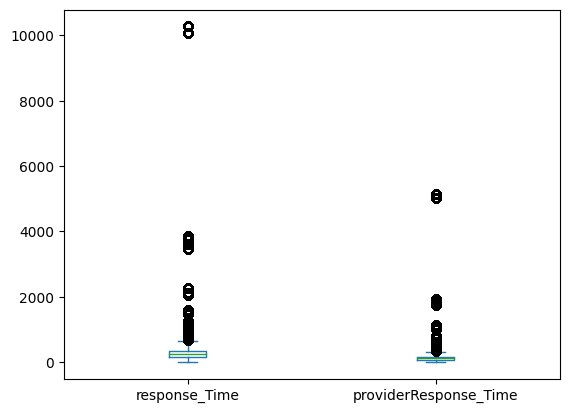

In [7]:
ax_df = data.plot( kind = "box")
plt.show()

Find Outlier of ProviderResponse_time

In [7]:
Q1 = data["providerResponse_Time"].quantile(0.25)
Q3 = data["providerResponse_Time"].quantile(0.75)

LB = Q1 - 1.5 * (Q3 - Q1)
UB = Q3 + 1.5 * (Q3 - Q1)

print(LB,UB)

-79.5 332.5


In [8]:
data[ data["providerResponse_Time"]<0]

,log_level,code,method,username,Price,gwStatus,planName,received_at,log_type,providerName,gatewayName,response_status,status,response_Time,paymentType,endpoint,providerResponse_Time,gwCode,call_type,api_type


In [9]:
len(data[ data["providerResponse_Time"]==0])

5001

In [10]:
len(data[ data["providerResponse_Time"]>334])

92785

Find Outlier of ProviderResponse_time

In [11]:
data["providerResponse_Time"].mean()

196.529349

In [12]:
Q1 = data["response_Time"].quantile(0.25)
Q3 = data["response_Time"].quantile(0.75)

LB = Q1 - 1.5 * (Q3 - Q1)
UB = Q3 + 1.5 * (Q3 - Q1)

print(LB,UB)

-159.0 665.0


In [13]:
data[ data["response_Time"]<0]

,log_level,code,method,username,Price,gwStatus,planName,received_at,log_type,providerName,gatewayName,response_status,status,response_Time,paymentType,endpoint,providerResponse_Time,gwCode,call_type,api_type


In [14]:
len(data[ data["response_Time"]==0])

2480

In [15]:
len(data[ data["response_Time"]>665])

92785

In [16]:
data["response_Time"].mean()

393.562312

In [17]:
data[data["providerResponse_Time"]>data["response_Time"]]

,log_level,code,method,username,Price,gwStatus,planName,received_at,log_type,providerName,gatewayName,response_status,status,response_Time,paymentType,endpoint,providerResponse_Time,gwCode,call_type,api_type


Missing Value

In [18]:
data.isnull().sum()

log_level                0
code                     0
method                   0
username                 0
Price                    0
gwStatus                 0
planName                 0
received_at              0
log_type                 0
providerName             0
gatewayName              0
response_status          0
status                   0
response_Time            0
paymentType              0
endpoint                 0
providerResponse_Time    0
gwCode                   0
call_type                0
api_type                 0
dtype: int64

Duplicate

In [19]:
data.duplicated().sum()

0

Add  Latency Coloumn 

In [20]:
latency=data["response_Time"]-data["providerResponse_Time"]
data["latency"]=latency

Visualization

username 

Text(0.5, 1.0, 'username ')

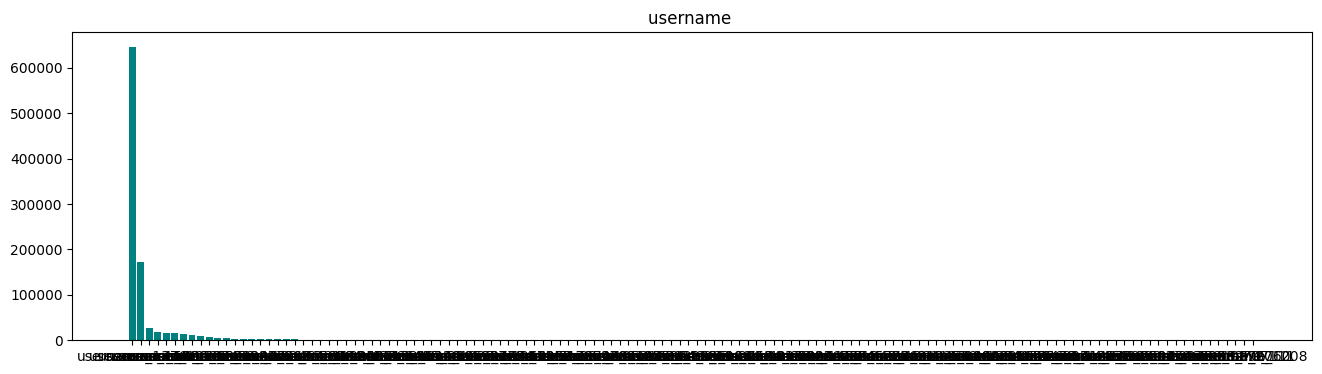

In [21]:
plt.figure(figsize=(16, 4))
plt.bar(data["username"].value_counts().index,data["username"].value_counts().values,color='teal')
plt.title("username ")

Text(0.5, 1.0, 'Top Five Username ')

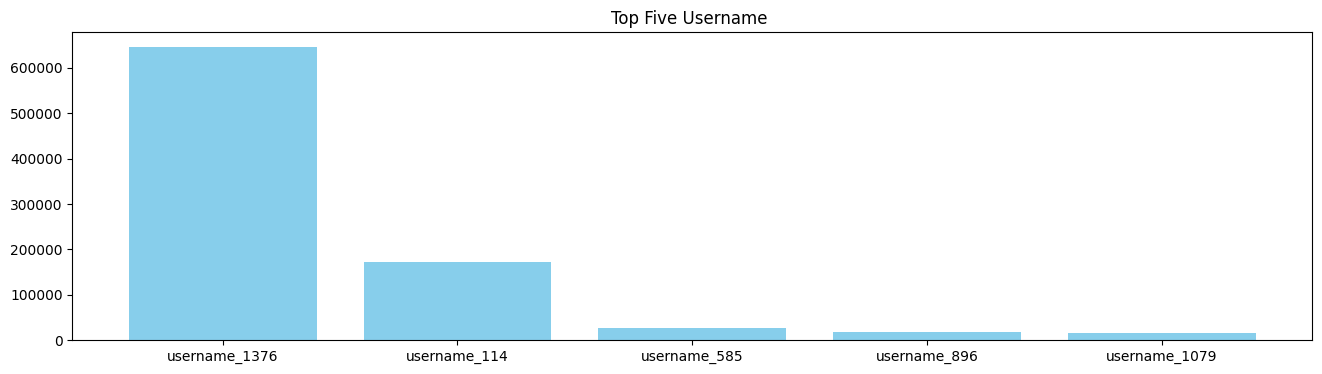

In [22]:
plt.figure(figsize=(16, 4))
plt.bar(data['username'].value_counts()[0:5].index,data['username'].value_counts()[0:5].values,color='skyblue')
plt.title("Top Five Username ")

ProviderName

Text(0.5, 1.0, 'providerName')

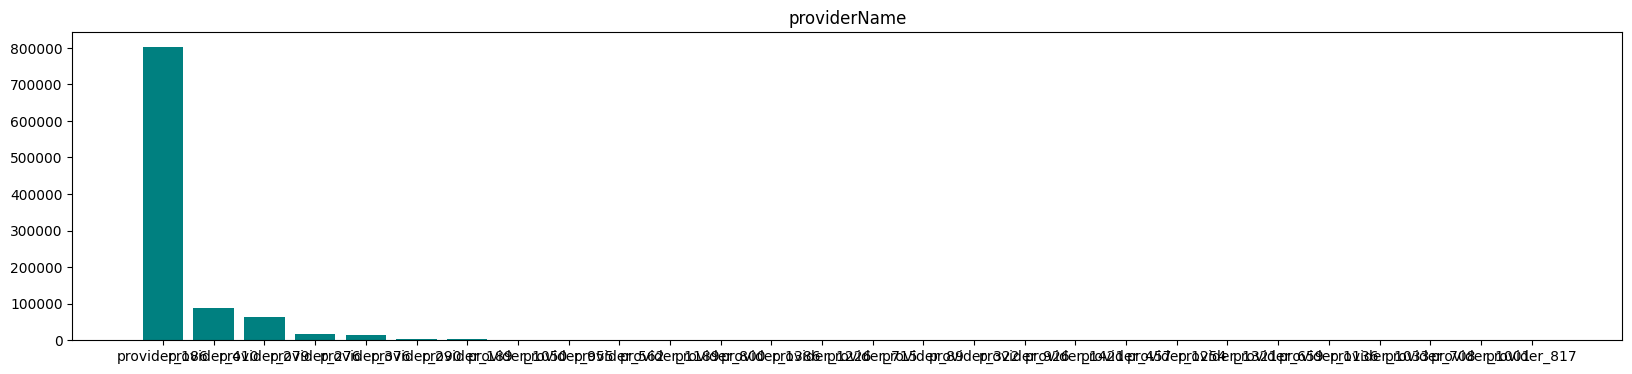

In [23]:
plt.figure(figsize=(20, 4))
plt.bar(data["providerName"].value_counts().index,data["providerName"].value_counts().values,color='teal')
plt.title("providerName")

Text(0.5, 1.0, 'Top Five ProviderName')

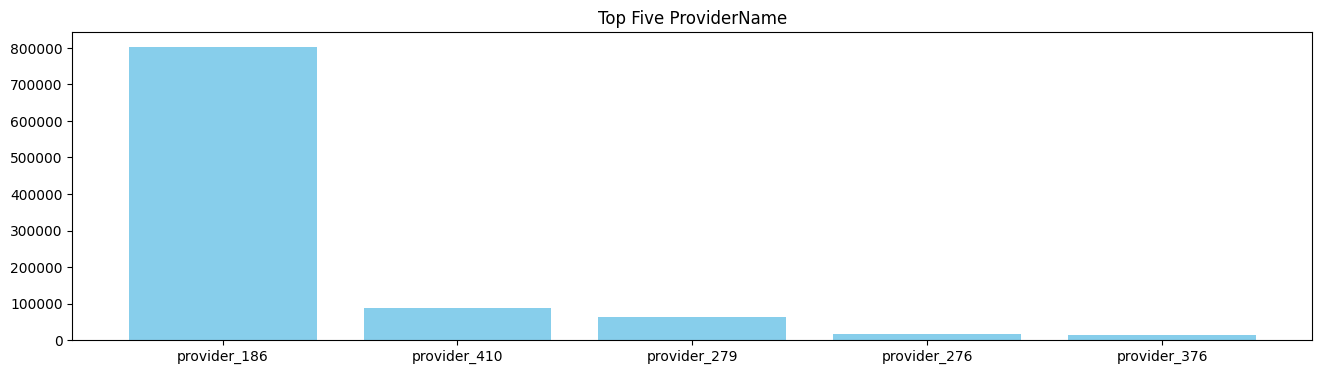

In [24]:
plt.figure(figsize=(16, 4))
plt.bar(data["providerName"].value_counts()[0:5].index,data["providerName"].value_counts()[0:5].values,color='skyblue')
plt.title("Top Five ProviderName")

Endpoint

Text(0.5, 1.0, 'Top Five endpoint')

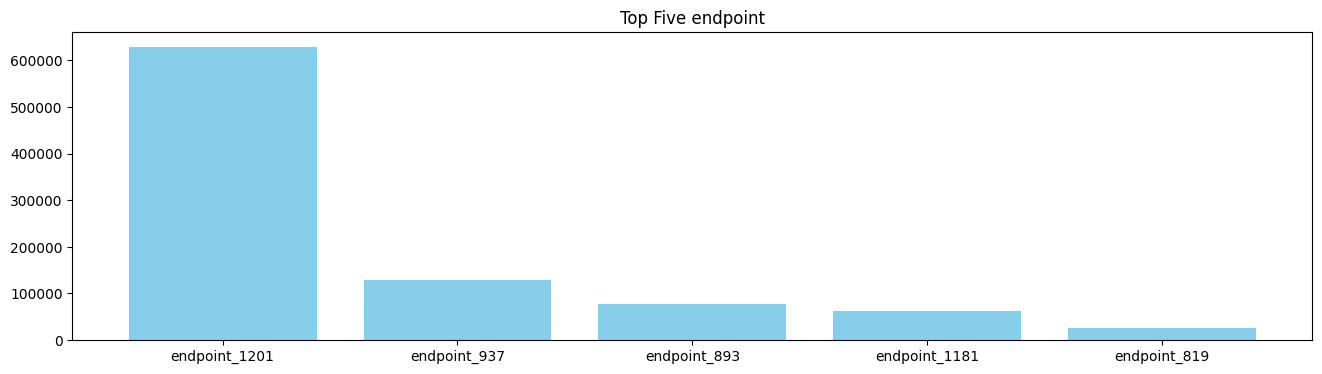

In [56]:
plt.figure(figsize=(16, 4))
plt.bar(data["endpoint"].value_counts()[0:5].index,data["endpoint"].value_counts()[0:5].values,color='skyblue')
plt.title("Top Five endpoint")

Price

(array([600105.,      0., 199679.,      0.,      0.,  49996.,      0.,
        100209.,      0.,  50011.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

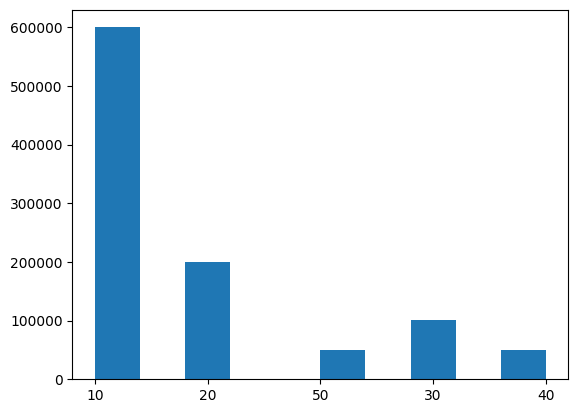

In [26]:
plt.hist(data['Price'])

log_type

Text(0.5, 1.0, 'log_type ')

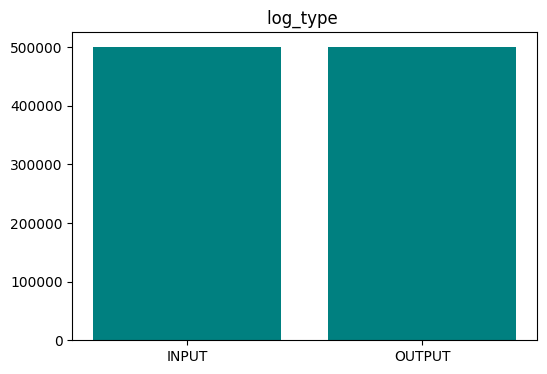

In [49]:
plt.figure(figsize=(6, 4))
plt.bar(data["log_type"].value_counts().index,data["log_type"].value_counts().values,color='teal')
plt.title("log_type ")

Response_status


Text(0.5, 1.0, 'response_status ')

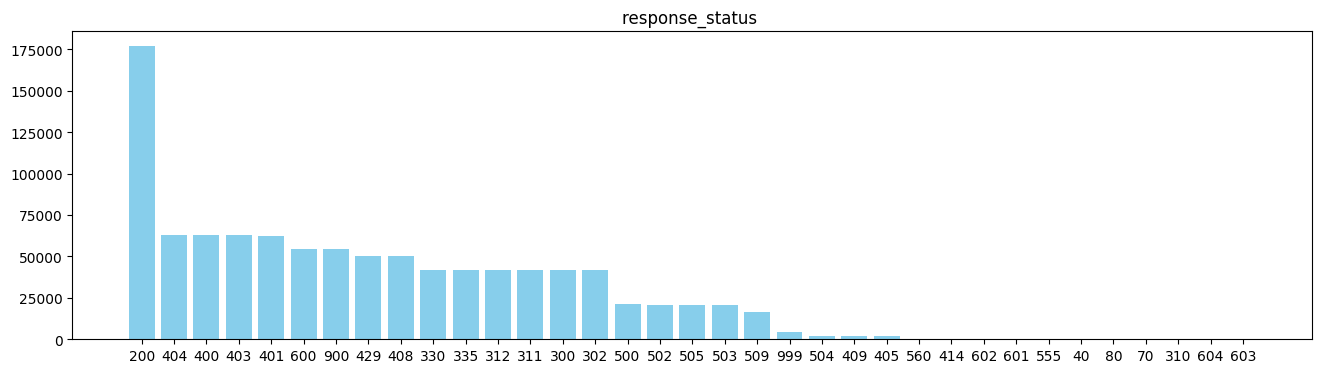

In [51]:
plt.figure(figsize=(16, 4))
plt.bar(data["response_status"].value_counts().index,data["response_status"].value_counts().values,color='skyblue')
plt.title("response_status ")

paymentType

Text(0.5, 1.0, 'paymentType ')

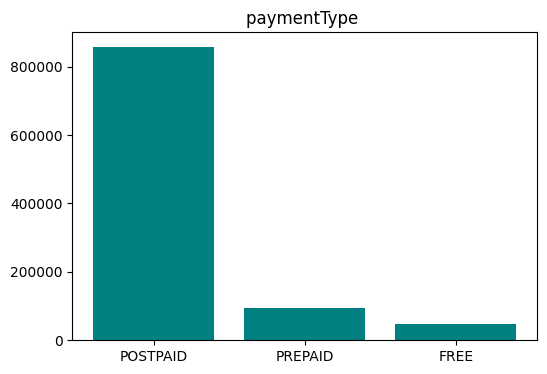

In [52]:
plt.figure(figsize=(6, 4))
plt.bar(data["paymentType"].value_counts().index,data["paymentType"].value_counts().values,color='teal')
plt.title("paymentType ")

Text(0.5, 1.0, 'paymentType ')

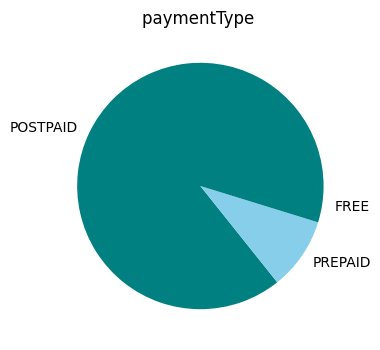

In [53]:
plt.figure(figsize=(6, 4))
plt.pie(data["paymentType"].value_counts().values,labels=data["paymentType"].value_counts().index,colors=['teal','skyblue'])
plt.title("paymentType ")

api_type

Text(0.5, 1.0, 'api_type')

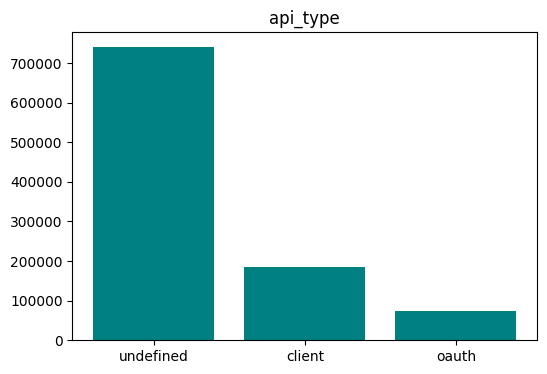

In [54]:
plt.figure(figsize=(6, 4))
plt.bar(data["api_type"].value_counts().index,data["api_type"].value_counts().values,color='teal')
plt.title("api_type")

latency

Text(0.5, 1.0, 'histogeram of Latenacy ')

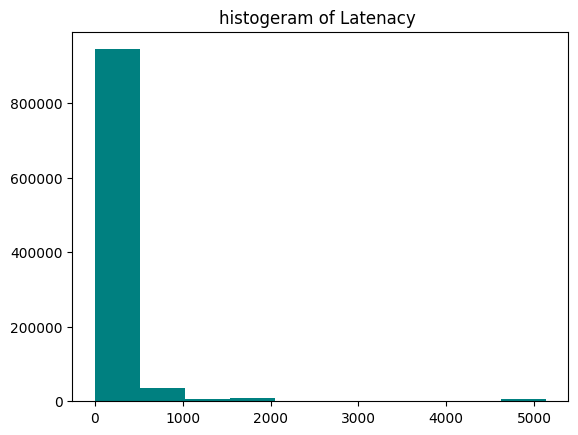

In [27]:
plt.hist(data["latency"],color='teal')
plt.title("histogeram of Latenacy ")

gwCode

Text(0.5, 1.0, 'Frequency of Gateway Code')

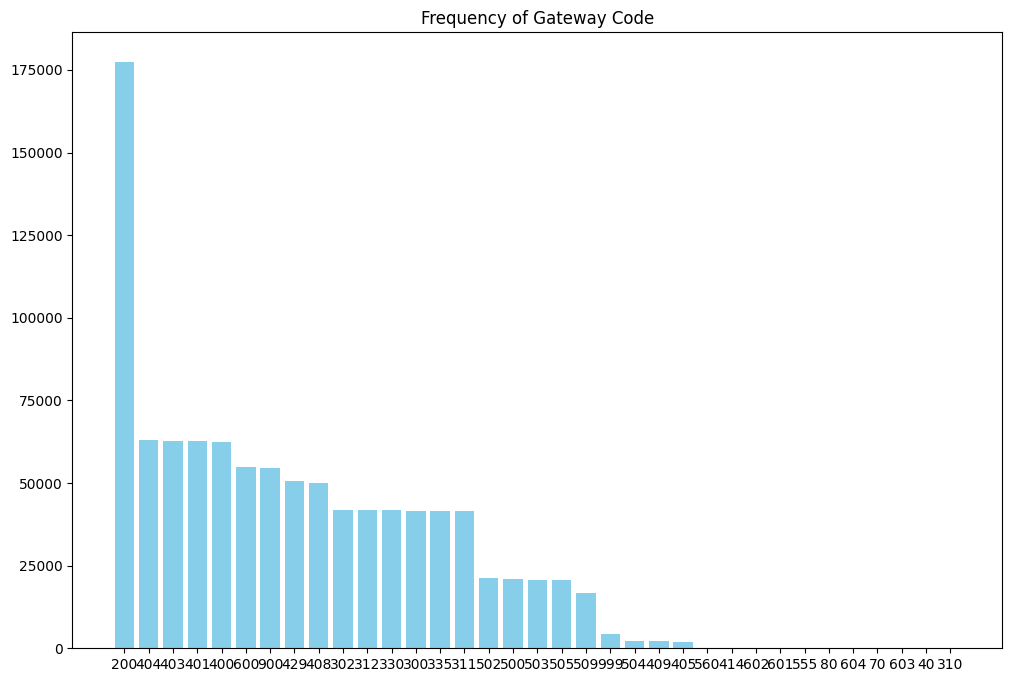

In [28]:
plt.figure(figsize=(12, 8))
plt.bar(data["gwCode"].value_counts().index,data["gwCode"].value_counts().values,color='skyblue')
plt.title("Frequency of Gateway Code")

Status

Text(0.5, 1.0, 'status ')

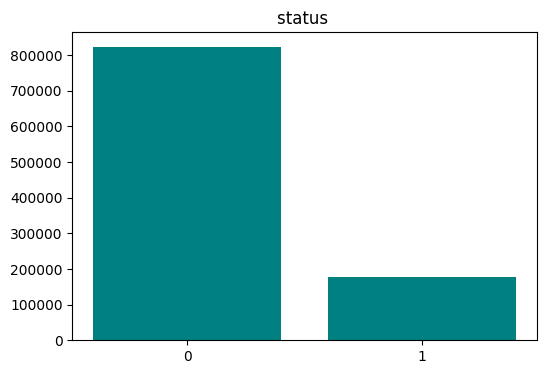

In [32]:
plt.figure(figsize=(6, 4))
plt.bar(data["status"].value_counts().index,data["status"].value_counts().values,color='teal')
plt.title("status ")

Text(0.5, 1.0, 'status ')

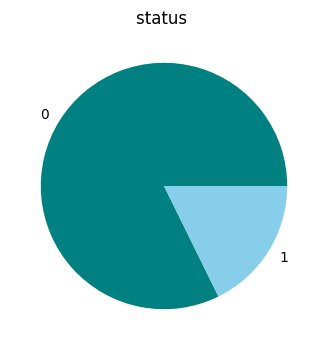

In [33]:
plt.figure(figsize=(6, 4))
plt.pie(data["status"].value_counts().values,labels=data["status"].value_counts().index,colors=['teal','skyblue'])
plt.title("status ")

providerResponse_Time

Text(0.5, 1.0, 'Histogram of providerResponse_Time')

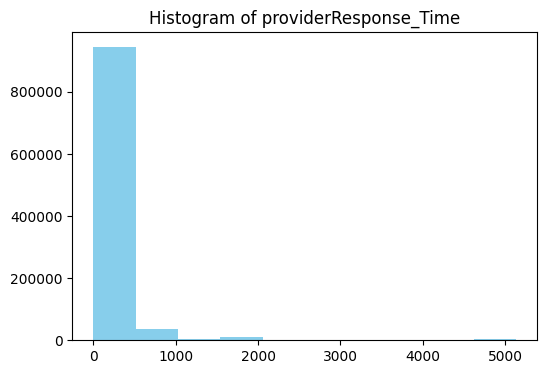

In [34]:
plt.figure(figsize=(6, 4))
plt.hist(data["providerResponse_Time"],color='skyblue')
plt.title("Histogram of providerResponse_Time")

call_type

Text(0.5, 1.0, 'call_type ')

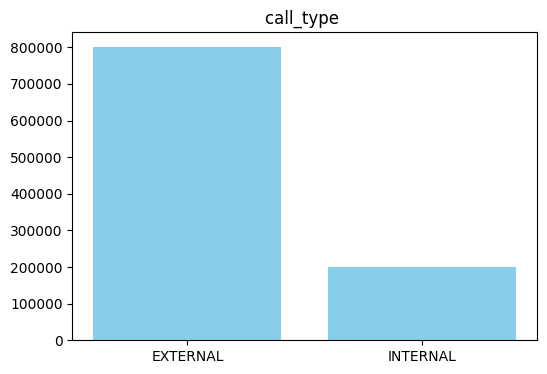

In [35]:
plt.figure(figsize=(6, 4))
plt.bar(data["call_type"].value_counts().index,data["call_type"].value_counts().values,color='skyblue')
plt.title("call_type ")

Table

In [36]:
data['providerName'].value_counts()

providerName
provider_186     802837
provider_410      89208
provider_279      62230
provider_276      15813
provider_376      14087
provider_290       4027
provider_189       3945
provider_1050      1577
provider_955        975
provider_562        963
provider_1189       949
provider_800        925
provider_1386       591
provider_1226       586
provider_715        497
provider_89         381
provider_322        181
provider_926         76
provider_1421        52
provider_457         37
provider_1254        28
provider_1321        11
provider_659          6
provider_1136         5
provider_1033         5
provider_708          4
provider_1001         3
provider_817          1
Name: count, dtype: int64

In [37]:
data['username'].value_counts().values

array([645982, 172681,  26397,  19151,  16585,  15894,  13893,  10837,
        10342,   6708,   6017,   4857,   3362,   3101,   3068,   2606,
         2550,   2290,   2143,   1827,   1702,   1557,   1550,   1537,
         1531,   1415,   1335,   1283,   1187,   1143,   1044,    841,
          833,    814,    726,    603,    573,    546,    488,    487,
          455,    451,    421,    417,    388,    346,    336,    324,
          318,    315,    299,    288,    253,    252,    247,    226,
          208,    192,    185,    151,    136,    125,    120,    111,
          109,    108,    100,     93,     90,     90,     89,     88,
           81,     80,     70,     65,     61,     60,     60,     52,
           43,     43,     43,     34,     32,     28,     28,     25,
           24,     23,     22,     22,     20,     20,     19,     17,
           17,     15,     15,     15,     13,     13,     12,     12,
           10,     10,      8,      7,      6,      6,      5,      5,
      

In [39]:
data[data['providerResponse_Time']==data['providerResponse_Time'].max()]['providerName'].value_counts()

providerName
provider_186     2031
provider_410      219
provider_279      155
provider_376       46
provider_276       41
provider_189       17
provider_290        7
provider_1050       5
provider_89         4
provider_1189       4
provider_1386       3
provider_715        2
provider_562        2
provider_955        2
provider_800        2
Name: count, dtype: int64

In [40]:
data[data['providerResponse_Time']==data['providerResponse_Time'].min()]['providerName'].value_counts()

providerName
provider_186     3999
provider_410      455
provider_279      284
provider_276       89
provider_376       84
provider_290       26
provider_189       18
provider_1050       9
provider_800        9
provider_562        6
provider_1189       5
provider_955        4
provider_715        3
provider_1226       3
provider_1386       3
provider_89         2
provider_322        1
provider_1033       1
Name: count, dtype: int64